# Multiple Linear Regression Model
## Shared Bikes Assignmnet

### The solution contains following steps: <br> 
Step 1: Data Understanding / Cleaning  <br> 
Step 2: Data Visualisation ( EDA Analysis) <br> 
Step 3: Data Preparation <br> 
Step 4: Splitting the Data into Training and Testing Sets <br> 
Step 5: Data Modeling and Evaluation <br> 

# Step 1: Data Understanding / Cleaning

In [75]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [76]:
# Ignoring Warning
import warnings
warnings.filterwarnings('ignore')

In [77]:
#Reading the csv file
bikedf = pd.read_csv('day.csv')

In [78]:
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [79]:
bikedf.shape

(730, 16)

In [80]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [81]:
#Checking for NULL values
bikedf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [82]:
# Checking columns present in bike dataset
print(bikedf.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [83]:
bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping the columns which do not have any significance in the analysis

instant   : 'index' of the record, not useful in  the analysis.                                                                                                                                 
dteday    : 'Season' is already deriverd from dteday, hence not required.                                                                                                                                    
registered: 'cnt' column is sum of 'casual' and 'registered',hence deleting 'registered'.                                       
casual    : 'cnt' column is sum of 'casual' and 'registered',hence deleting 'casual'. 
    

In [84]:
col_drop =['instant','dteday','casual','registered']
bikedf.drop(col_drop,axis =1 , inplace = True)

In [85]:
bikedf.shape

(730, 12)

In [86]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Mapping of Categorial Variables

In [87]:
# Finding distinct values in season column
bikedf.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [88]:
# Mapping of season column
bikedf['season'] = bikedf['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [89]:
# Finding distinct values in mnth column
bikedf.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [90]:
# Mapping of mnth column
bikedf['mnth'] = bikedf['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 
                                     8: 'Aug', 9: 'Sep', 10: 'Oct',11: 'Nov', 12:'Dec'})
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [91]:
# Finding distinct values in weekday column
bikedf.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [92]:
# Mapping of weekday column
bikedf['weekday'] = bikedf['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",
                                           4:"Thursday",5:"Friday",6:"Saturday"})
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [93]:
# Finding distinct values in weekday column
bikedf.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [94]:
#  maped weathersit column
bikedf['weathersit'] = bikedf['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', })
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Step 2:  Data Visualisation ( EDA Analysis)

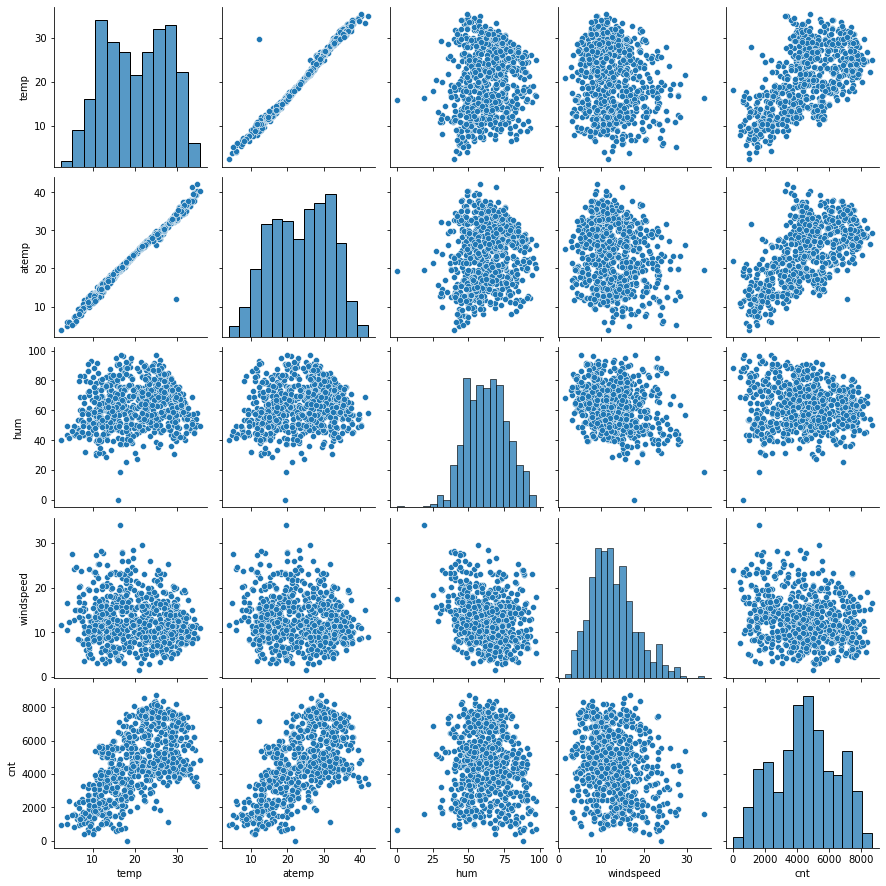

In [95]:
#pair plot for continuous variables
sns.pairplot(bikedf, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

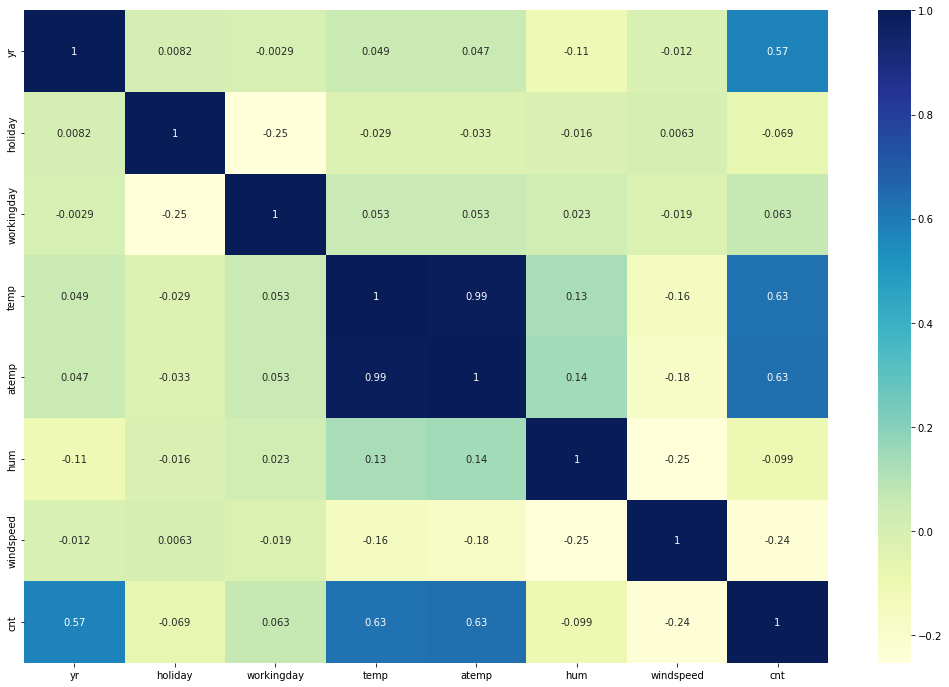

In [96]:
# Hitmap to find co-relation
plt.figure(figsize = (18, 12))
sns.heatmap(bikedf.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [97]:
# Both 'temp' and 'atemp' are highly co-related(0.99),hence deleting atemp.
bikedf.drop(['atemp'],axis =1,inplace = True)
bikedf.shape

(730, 11)

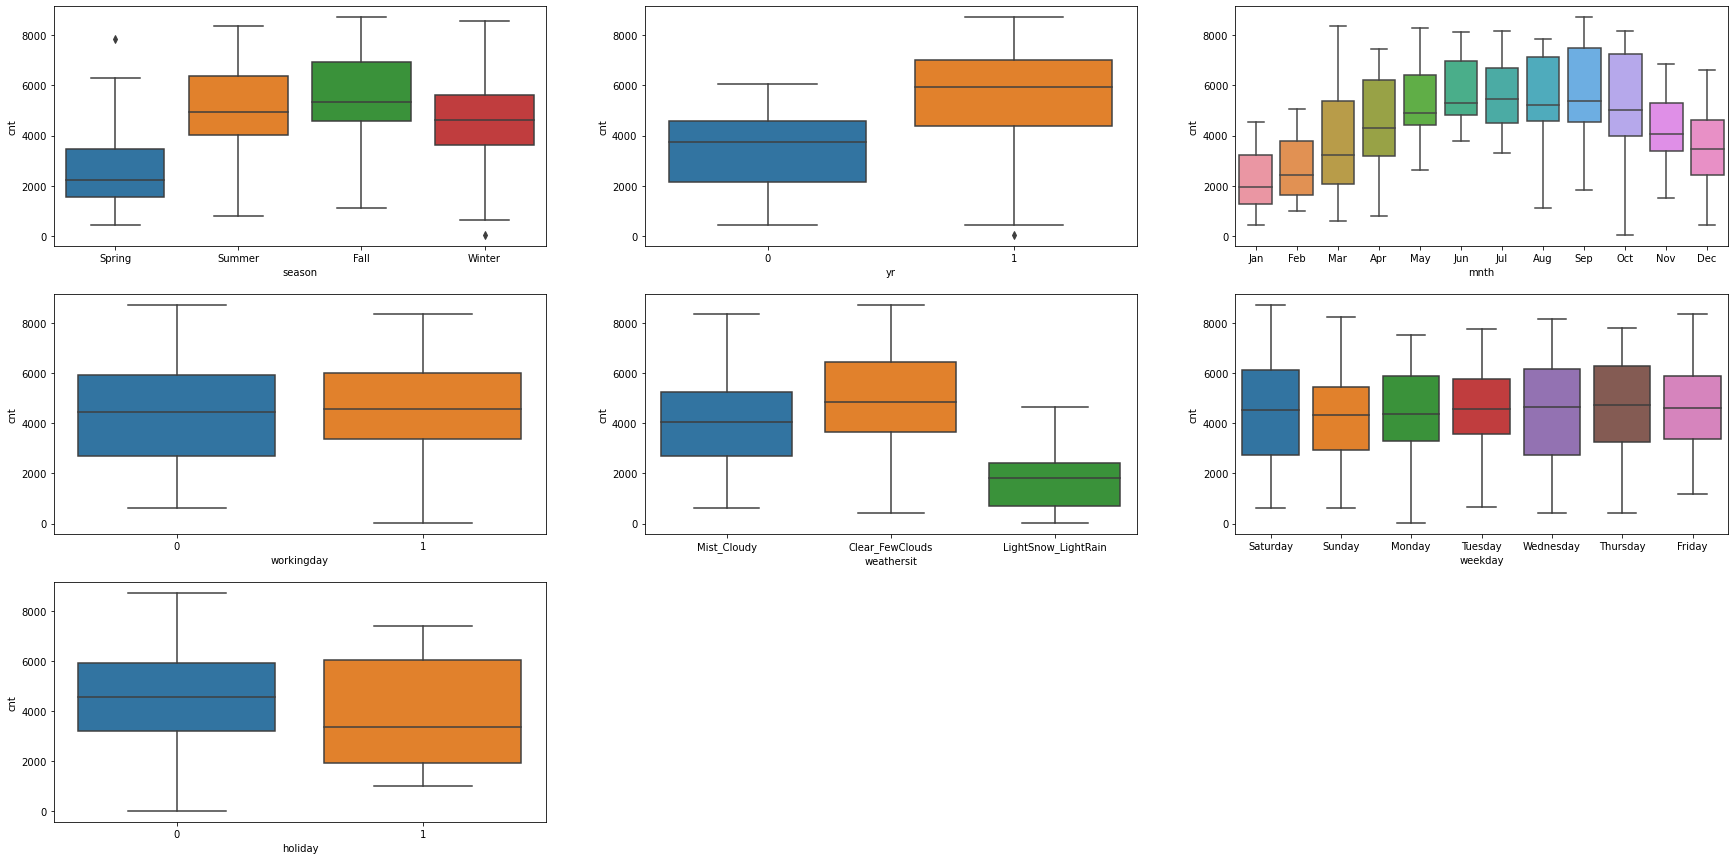

In [98]:
#Box-plot For Categorical Variables
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikedf)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikedf)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedf)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedf)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedf)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedf)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedf)
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Step 3:  Data Preparation 

In [99]:
# creating dummy variables for season, weekday, mnth and weathersit
dummy_vars = pd.get_dummies(bikedf[['season','weekday','mnth','weathersit']],drop_first=True)

In [100]:
# concatenating the dummy columns with original df
bikedf = pd.concat([bikedf,dummy_vars], axis = 1)

In [101]:
# drop original column
bikedf.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)
bikedf.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [102]:
bikedf[['yr','holiday','workingday']]= bikedf[['yr','holiday','workingday']].astype('uint8')

In [103]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_Spring                   730 non-null    uint8  
 8   season_Summer                   730 non-null    uint8  
 9   season_Winter                   730 non-null    uint8  
 10  weekday_Monday                  730 non-null    uint8  
 11  weekday_Saturday                730 non-null    uint8  
 12  weekday_Sunday                  730 

In [104]:
bikedf.shape

(730, 29)

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Step 4: Splitting the Data into Training and Testing Sets

In [105]:
np.random.seed(0)
df_train, df_test = train_test_split(bikedf, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [106]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Rescaling the dataset

In [107]:
scaler = MinMaxScaler()

In [108]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [109]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Split data set into X and y sets for  train set

In [110]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,weekday_Monday,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Step 5: Data Modeling and Evaluation

### Recusive Feature Elemination (RFE)

In [112]:
# Check all the columns of the dataframe
bikedf.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [113]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [114]:
# Select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'weekday_Saturday',
       'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [115]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weathersit_LightSnow_LightRain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [116]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'weekday_Saturday',
       'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [117]:
X_train.columns[~rfe.support_]

Index(['weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [118]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [119]:
# Adding a constant variable 
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [120]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [121]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.31e-191
Time:                        16:30:03   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [122]:
# Calculating VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.48
7,season_Summer,2.84
14,weathersit_Mist_Cloudy,2.29
0,yr,2.09
9,weekday_Saturday,1.98


In [123]:
# All p values are below 0.05. Dropping 'hum' column since it has a very high VIF 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [124]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [125]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [126]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.33e-189
Time:                        16:30:03   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [127]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_Spring,3.08
6,season_Summer,2.33
0,yr,2.08
7,season_Winter,1.99
8,weekday_Saturday,1.97
9,mnth_Jan,1.62
10,mnth_Jul,1.59


In [128]:
# All p values are below 0.05. Dropping 'workingday' column since it has a very high VIF 
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [129]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.21e-186
Time:                        16:30:03   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [130]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,season_Spring,2.76
5,season_Summer,2.23
0,yr,2.07
6,season_Winter,1.80
8,mnth_Jan,1.61
9,mnth_Jul,1.59
12,weathersit_Mist_Cloudy,1.56
10,mnth_Sep,1.34


In [131]:
# Dropping 'weekday_Saturday' column since it has a very high p-value 
X_train_rfe=X_train_rfe.drop(['weekday_Saturday'],axis=1)

In [132]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.97e-187
Time:                        16:30:03   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [133]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,season_Spring,2.75
5,season_Summer,2.22
0,yr,2.07
6,season_Winter,1.79
7,mnth_Jan,1.61
8,mnth_Jul,1.59
11,weathersit_Mist_Cloudy,1.56
9,mnth_Sep,1.34


In [134]:
# Dropping 'mnth_Jan' column since it has a very high p-value 
X_train_rfe=X_train_rfe.drop(['mnth_Jan'],axis=1)

In [135]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.40e-187
Time:                        16:30:03   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [136]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_Summer,2.21
4,season_Spring,2.08
0,yr,2.07
6,season_Winter,1.79
7,mnth_Jul,1.58
10,weathersit_Mist_Cloudy,1.55
8,mnth_Sep,1.34
9,weathersit_LightSnow_LightRain,1.08


### temp is highly co-related with cnt ,It's VIF is near to 5. We will  not drop the same. For all others p-value is less than 0.05 and VIF is also less than 5. Hence conluding lm5 is final model.

## Residual Analysis of the train data

In [137]:
y_train_cnt = lm5.predict(X_train_rfe5)

In [138]:
#import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [139]:
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

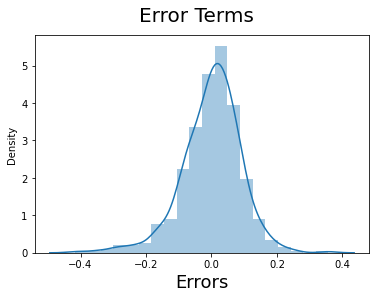

In [140]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

 

## Making Predictions

#### Applying the scaling on the test sets

In [141]:
#Scaling the test data

num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#### Split data set into X and y sets for test set

In [142]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [143]:
X_train_new=X_train_rfe5.drop(['const'], axis=1)

In [144]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [145]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           219 non-null    float64
 1   yr                              219 non-null    uint8  
 2   holiday                         219 non-null    uint8  
 3   temp                            219 non-null    float64
 4   windspeed                       219 non-null    float64
 5   season_Spring                   219 non-null    uint8  
 6   season_Summer                   219 non-null    uint8  
 7   season_Winter                   219 non-null    uint8  
 8   mnth_Jul                        219 non-null    uint8  
 9   mnth_Sep                        219 non-null    uint8  
 10  weathersit_LightSnow_LightRain  219 non-null    uint8  
 11  weathersit_Mist_Cloudy          219 non-null    uint8  
dtypes: float64(3), uint8(9)
memory usag

In [146]:
y_pred = lm5.predict(X_test_new)

Text(0, 0.5, 'y_pred')

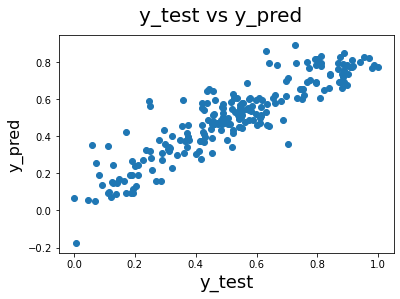

In [147]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [148]:
r2_score(y_test, y_pred)

0.7946441655503018

### Based on final model following variables are significant in predicting the demand for shared bikes.
### year (0.233), holiday(-0.098), Temperature (0.491)
